In [688]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading dataset

In [692]:
url = 'https://raw.githubusercontent.com/ruslan16bmstu/ML/main/heart_cleveland_upload.csv'

In [693]:
df = pd.read_csv(url)

# Description

In [694]:
df.shape

(297, 14)

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [696]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [697]:
y = df['condition']
df.drop(labels='condition', axis=1, inplace=True)

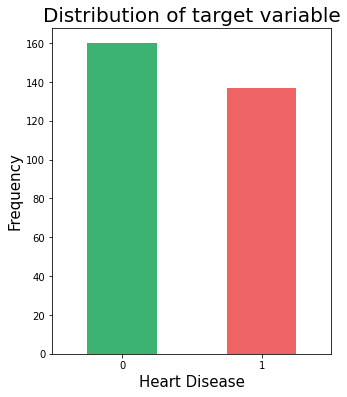

In [699]:
y.value_counts().plot(kind="bar",figsize=(5,6),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=20)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(rotation=0)
plt.show()

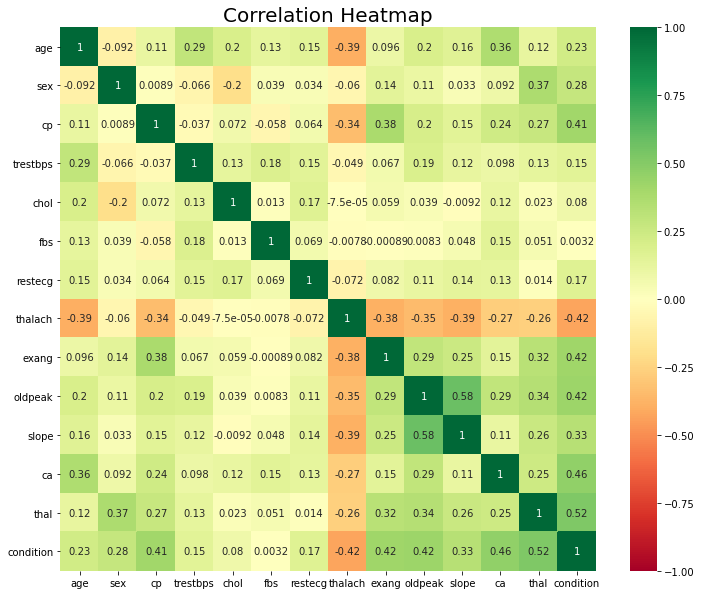

In [684]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="RdYlGn")
plt.title("Correlation Heatmap",fontsize=20)
plt.show()

# Data preprocessing

In [700]:
scaler = MinMaxScaler()

data_transformed = df[['sex', 'fbs', 'exang']].values

scale_list = ['age', 'trestbps', 'chol', 'restecg', 'oldpeak']
ohe_list = ['cp', 'restecg', 'slope', 'ca', 'thal']

for col in scale_list:
    data_transformed = np.hstack((data_transformed, scaler.fit_transform(df[[col]])))

for col in ohe_list:
    data_transformed = np.hstack((data_transformed, pd.get_dummies(df[col], prefix=col).values))

In [701]:
data_transformed.shape

(297, 25)

In [702]:
X_train, X_test, y_train, y_test = train_test_split(data_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Model training

In [703]:
#clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)
#clf = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=42)

In [714]:
# mispredicting a disease is better than not predicting, so we give class 1 a higher weight.
clf = LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42)

In [715]:
clf.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42)

# Model prediction

In [716]:
y_pred = clf.predict(X_test)

In [717]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.90      0.96      0.93        28

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



In [718]:
cm = confusion_matrix(y_test, y_pred)

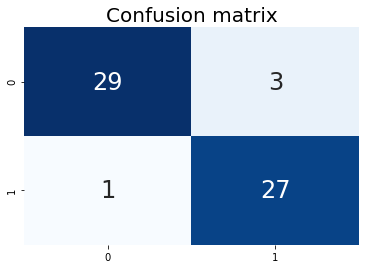

In [719]:
plt.figure()
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})
plt.title("Confusion matrix",fontsize=20)
plt.show()

In [720]:
!python --version

Python 3.8.5


In [723]:
import sklearn
sklearn.__version__, pd.__version__, np.__version__

('0.23.2', '1.3.4', '1.21.4')